In [3]:
# %%time
# import zipfile
# with zipfile.ZipFile("Drowsiness detection.zip",'r') as z:
#     z.extractall("driverxml")
# with zipfile.ZipFile("test1.zip",'r') as z:
#     z.extractall(".")

CPU times: total: 344 ms
Wall time: 345 ms


In [1]:
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [8]:
def plot_imgs(directory, top= 10):
    all_item_dirs = os.listdir(directory)
    item_files = [os.path.join(directory,file) for file in all_item_dirs][:5]
    plt.figure(figsize= (20,20))
    for i , img_path in enumerate(item_files):
        plt.subplot(10,10,i+1)
        img = plt.imread(img_path)
        plt.tight_layout()
        plt.imshow(img,cmap='gray')

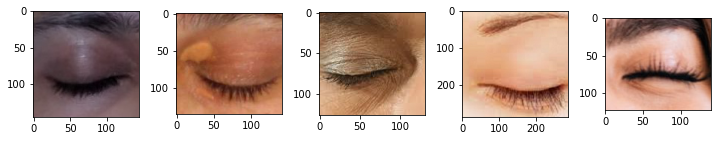

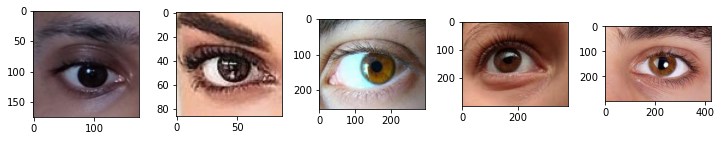

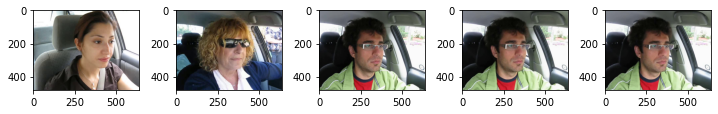

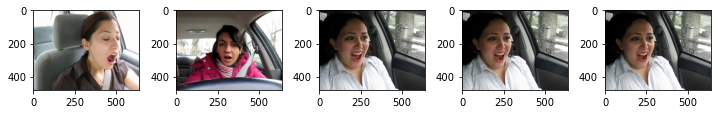

In [9]:
data_path = "driverdrowsiness/dataset_new/train"
directories = ['/Closed', '/Open','/no_yawn','/yawn']
for j in directories:
    plot_imgs(data_path+j)

In [14]:
batch_size = 128
train_datagen = ImageDataGenerator(horizontal_flip= True, rescale = 1./255 , zoom_range =0.2 , validation_split= 0.1)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
train_data_path = 'driverdrowsiness/dataset_new/train'
test_data_path = 'driverdrowsiness/dataset_new/test'

In [22]:
train_set = train_datagen.flow_from_directory(train_data_path, target_size = (256,256),batch_size = batch_size,
                                             color_mode= 'grayscale',class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_data_path, target_size = (256,256),batch_size = batch_size,
                                             color_mode= 'grayscale',class_mode = 'categorical')

Found 2467 images belonging to 4 classes.
Found 433 images belonging to 4 classes.


In [59]:
len(train_set)

20

In [17]:
classes = 4 
model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (256,256,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(classes, activation = 'softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

In [19]:
model.compile(loss= 'categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])

In [20]:
model_path="yawn_detection1.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [30]:
epochs = 10
training_steps = train_set.n//train_set.batch_size
validation_steps = test_set.n// test_set.batch_size

AttributeError: 'DirectoryIterator' object has no attribute 'size'

In [32]:
history = model.fit(train_set, epochs=  epochs, steps_per_epoch = training_steps, validation_data = test_set, validation_steps = validation_steps, callbacks=callbacks_list )

Epoch 1/10
19/19 [==============================] - ETA: 0s - loss: 1.1020 - accuracy: 0.4844
Epoch 1: val_accuracy improved from -inf to 0.64583, saving model to yawn_detection1.h5
19/19 [==============================] - 46s 1s/step - loss: 1.1020 - accuracy: 0.4844 - val_loss: 0.6993 - val_accuracy: 0.6458
Epoch 2/10
19/19 [==============================] - ETA: 0s - loss: 0.6219 - accuracy: 0.7080
Epoch 2: val_accuracy improved from 0.64583 to 0.75000, saving model to yawn_detection1.h5
19/19 [==============================] - 26s 1s/step - loss: 0.6219 - accuracy: 0.7080 - val_loss: 0.6467 - val_accuracy: 0.7500
Epoch 3/10
19/19 [==============================] - ETA: 0s - loss: 0.4809 - accuracy: 0.7649
Epoch 3: val_accuracy did not improve from 0.75000
19/19 [==============================] - 26s 1s/step - loss: 0.4809 - accuracy: 0.7649 - val_loss: 0.5147 - val_accuracy: 0.7240
Epoch 4/10
19/19 [==============================] - ETA: 0s - loss: 0.4323 - accuracy: 0.7777
Epoch 4

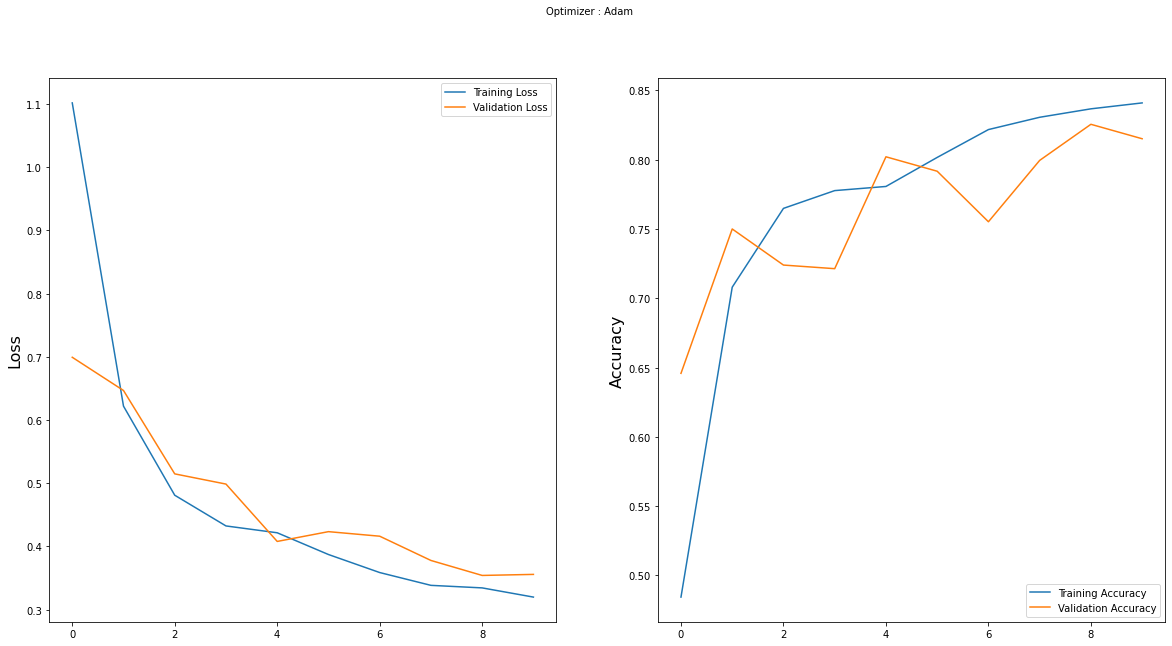

In [33]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

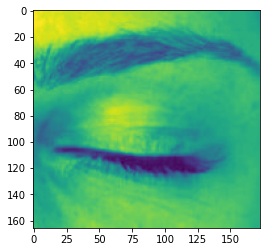

In [4]:
import cv2
import numpy as np
img = cv2.imread('driverdrowsiness/dataset_new/test/Closed/_107.jpg',0)
plt.imshow(img)

In [44]:
img.shape

(166, 173)

In [68]:
resized_image = cv2.resize(img, (256, 256)) 
resized_image= np.expand_dims(resized_image,axis = -1)
resized_image= np.expand_dims(resized_image,axis = 0)

In [69]:
resized_image.shape

(1, 256, 256, 1)

In [70]:
model.predict(resized_image)

1/1 [==============================] - 5s 5s/step


array([[1., 0., 0., 0.]], dtype=float32)

'/Closed', '/Open','/no_yawn','/yawn'